In [16]:
from sklearn import tree
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

import pandas as pd

csv_train = pd.read_csv(filepath_or_buffer="C:/Users/jhj/Desktop/LG Data/train.csv", encoding="cp949", sep=",")
csv_test = pd.read_csv(filepath_or_buffer="C:/Users/jhj/Desktop/LG Data/test.csv", encoding="cp949", sep=",")

train_x = csv_train.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
train_y = csv_train['Y_Class']

test_x = csv_test.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

x = csv_train.loc[:,'X_1':'X_2875']
y = csv_train.loc[:,'Y_Class']

x = x.fillna(0)
y = y.fillna(0)

Done.


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 


GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': (5, 8), 'min_samples_leaf': (8, 18),
                         'min_samples_split': (8, 16),
                         'n_estimators': (100, 200)})

In [20]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

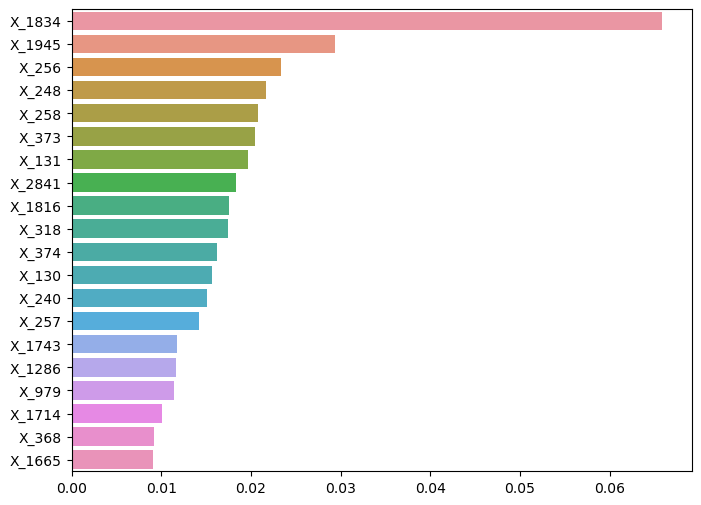

In [21]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


In [22]:
x=x.loc[:,['X_1834','X_1945','X_256','X_248','X_258','X_373','X_131','X_2841','X_1816','X_318','X_374','X_130','X_240','X_257','X_1743','X_1286']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms

RF = RandomForestClassifier(random_state=37).fit(X_train, y_train)
print('Done.')
y_pred = RF.predict(X_test)
test_x = test_x.drop(columns=['LINE', 'PRODUCT_CODE'])

Done.


In [24]:
test_x=test_x.loc[:,['X_1834', 'X_1945','X_256','X_248','X_258','X_373','X_131','X_2841','X_1816','X_318','X_374','X_130','X_240','X_257','X_1743','X_1286']]

In [10]:
preds = RF.predict(test_x)
print('Done.')
submit = pd.read_csv("C:/Users/jhj/Desktop/LG Data/sample_submission.csv")
submit['Y_Class'] = preds
submit.to_csv('C:/Users/jhj/Desktop/LG Data/sample_submission.csv', index=False)

Done.
